In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import utilities

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
address_list, prior_counts = utilities.address_prior_counts('OR',3,6)

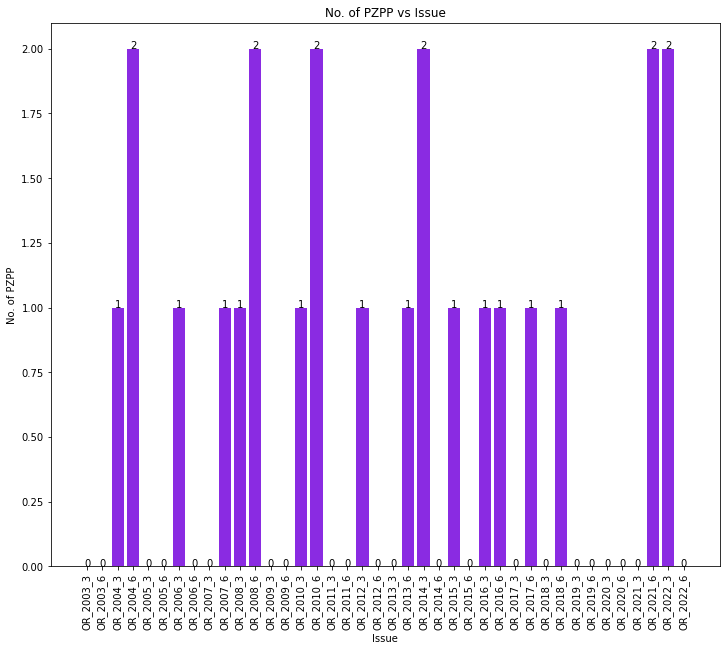

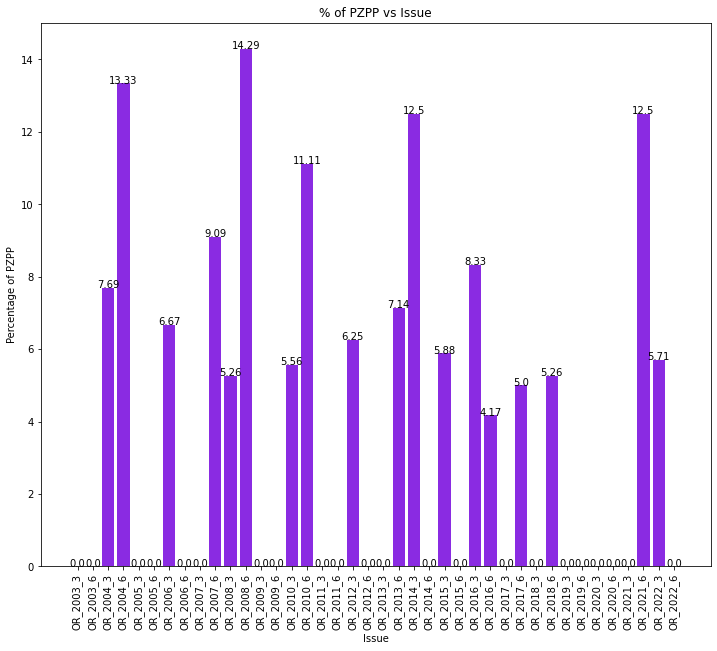

In [4]:
zeroes, names, pers = utilities.pzpp_vs_issue(prior_counts)

% of PZPPs (Unweighted Avg): 3.64%
% of PZPPs (Weighted Avg): 3.58%


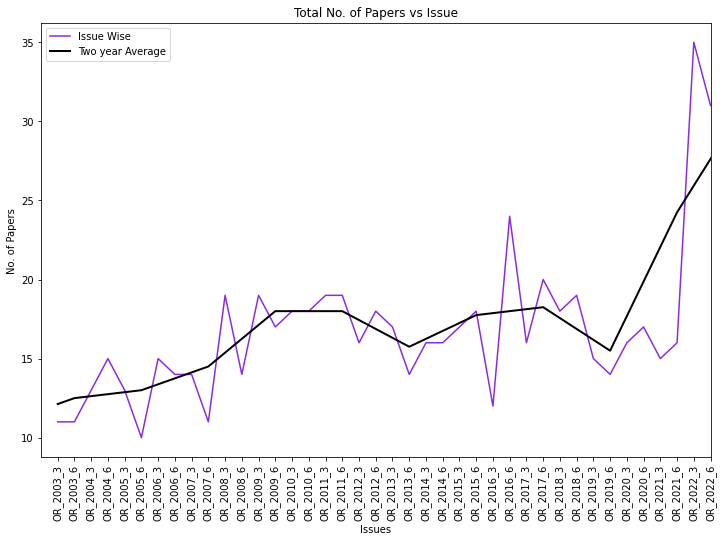

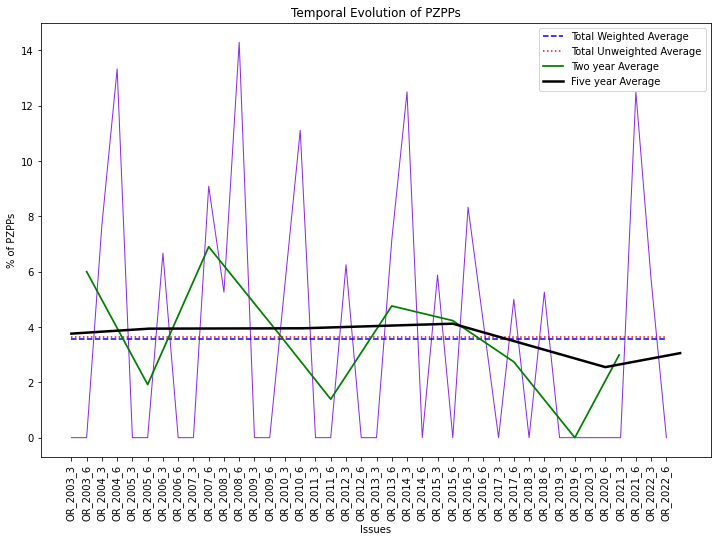

In [5]:
utilities.averages(prior_counts, zeroes, names, pers)

In [6]:
zeroes_map = {}
for i in range(len(zeroes)):
    if zeroes[i] in zeroes_map:
        zeroes_map[zeroes[i]] += 1
    else:
        zeroes_map[zeroes[i]] = 1
        
zeroes_map = {k:v for k,v in sorted(zeroes_map.items(), key = lambda x: x[0])}
zers = list(zeroes_map.keys())
freq = list(zeroes_map.values())

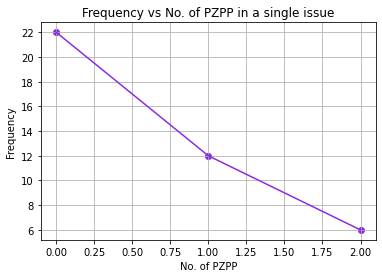

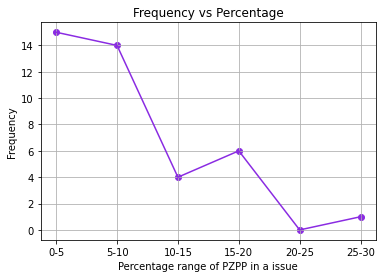

In [7]:
plt.plot(zers, freq,color = 'blueviolet')
plt.scatter(zers, freq,color = 'blueviolet')
plt.xlabel('No. of PZPP')
plt.ylabel('Frequency ')
plt.title('Frequency vs No. of PZPP in a single issue')
plt.grid()
plt.show()
pers_map = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0 }
for i in range(len(pers)):
    pers_map[pers[i]//5]+=1
prc = ['0-5','5-10','10-15', '15-20','20-25','25-30']
freq1 = [15,14,4,6,0,1]
plt.plot(prc, freq1,color = 'blueviolet')
plt.scatter(prc, freq1,color = 'blueviolet')
plt.xlabel('Percentage range of PZPP in a issue')
plt.ylabel('Frequency')
plt.title('Frequency vs Percentage')
plt.grid()
plt.show()

In [21]:
departments_freq = utilities.departments_freq('OR', 3, 6)

In [22]:
utilities.dept_adder(departments_freq, 'optimization', ['optimiation','robust optimization','networks/graphs: theory','methods'])
utilities.dept_adder(departments_freq, 'games, information, and networks', ['game, information, and networks','games, information, and networks.','games and networks','games, information, andnetworks'])
utilities.dept_adder(departments_freq, 'operations and supply chains', ['manufacturing, service, and supply chain operations','operations and supply chain','operations management','manufacturing, service, and supply-chain operations'])
utilities.dept_adder(departments_freq, 'military and homeland security', ['military'])
utilities.dept_adder(departments_freq, 'stochastic models', ['stochastic model'])
utilities.dept_adder(departments_freq, 'or practice', ['orpractice'])
utilities.dept_adder(departments_freq, 'revenue management', ['revenue management and market analytics', 'marketing analytics and revenue management', 'revenue management andmarket analytics','budget management'])
utilities.dept_adder(departments_freq, 'environment, energy, and sustainability', ['energy and sustainability',': environment, energy, and sustainability','environment, energy and sustainability','environment, energy, and natural resources'])
utilities.dept_adder(departments_freq, 'policy modeling and public sector or', ['policy modeling and publicsector operations research'])
utilities.dept_adder(departments_freq, 'financial engineering', ['finance'])
utilities.dept_adder(departments_freq, 'special issues', ['special issue on or for the public interest - security and critical infrastructure', 'special issue: mathematical models of individual and group decision making in operations research', 'special issue on information and decisions in social and economic networks','special issue on operations research in health care'])
utilities.dept_adder(departments_freq, 'others', ['nf', 'computing and decision technology', 'computing and information technologies', 'new/nontraditional areas', 'invited papers', 'telecommunications and networking', 'communications', 'computational economics'])
del departments_freq['editor-in-chief']

In [23]:
departments_freq = {k:v for k, v in sorted(departments_freq.items(), key = lambda x: x[1], reverse = True)}
department_names = list(departments_freq.keys())
freq2 = list(departments_freq.values())

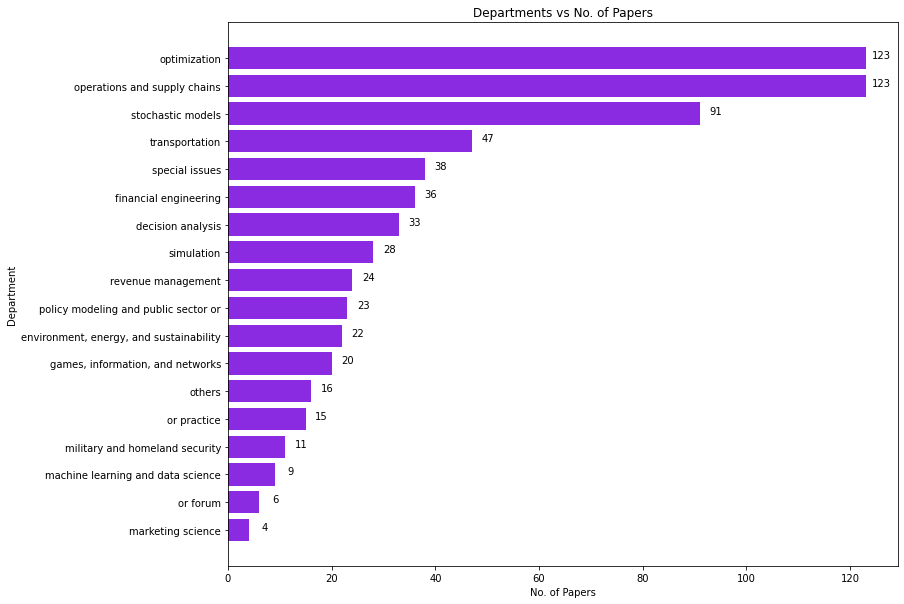

In [24]:
def addlabel(x,y):
    k = max(x)
    for i in range(len(x)):
        plt.text(x[i]+k/40, i, x[i], ha = 'center')
plt.figure(figsize = (12,10))
plt.barh(department_names, freq2,color = 'blueviolet')
plt.title('Departments vs No. of Papers')
plt.ylabel('Department')
plt.xlabel('No. of Papers')
plt.gca().invert_yaxis()
addlabel(freq2,department_names)

In [25]:
sum(zeroes)

24

In [26]:
utilities.received_accepted_time('OR',3,6)
departments_time = utilities.departments_wise_time('OR',3,6)
departments_pzpp = utilities.departments_wise_pzpp('OR',3,6)

In [27]:
utilities.dept_adder(departments_pzpp, 'optimization', ['optimiation','robust optimization','networks/graphs: theory','methods'])
utilities.dept_adder(departments_pzpp, 'games, information, and networks', ['game, information, and networks','games, information, and networks.','games and networks','games, information, andnetworks'])
utilities.dept_adder(departments_pzpp, 'operations and supply chains', ['manufacturing, service, and supply chain operations','operations and supply chain','operations management','manufacturing, service, and supply-chain operations'])
utilities.dept_adder(departments_pzpp, 'military and homeland security', ['military'])
utilities.dept_adder(departments_pzpp, 'stochastic models', ['stochastic model'])
utilities.dept_adder(departments_pzpp, 'or practice', ['orpractice'])
utilities.dept_adder(departments_pzpp, 'revenue management', ['revenue management and market analytics', 'marketing analytics and revenue management', 'revenue management andmarket analytics','budget management'])
utilities.dept_adder(departments_pzpp, 'environment, energy, and sustainability', ['energy and sustainability',': environment, energy, and sustainability','environment, energy and sustainability','environment, energy, and natural resources'])
utilities.dept_adder(departments_pzpp, 'policy modeling and public sector or', ['policy modeling and publicsector operations research'])
utilities.dept_adder(departments_pzpp, 'financial engineering', ['finance'])
utilities.dept_adder(departments_pzpp, 'special issues', ['special issue on or for the public interest - security and critical infrastructure', 'special issue: mathematical models of individual and group decision making in operations research', 'special issue on information and decisions in social and economic networks','special issue on operations research in health care'])
utilities.dept_adder(departments_pzpp, 'others', ['nf', 'computing and decision technology', 'computing and information technologies', 'new/nontraditional areas', 'invited papers', 'telecommunications and networking', 'communications', 'computational economics'])
del departments_pzpp['editor-in-chief']

In [28]:
departments_pzpp = {k:v for k, v in sorted(departments_pzpp.items(), key = lambda x: x[1], reverse = True)}
d_ppzpp = []
for i in departments_pzpp.keys():
    d_ppzpp.append(round(departments_pzpp[i]/departments_freq[i]*100,2))
nms = list(departments_pzpp.keys())
d_npzpp = list(departments_pzpp.values())

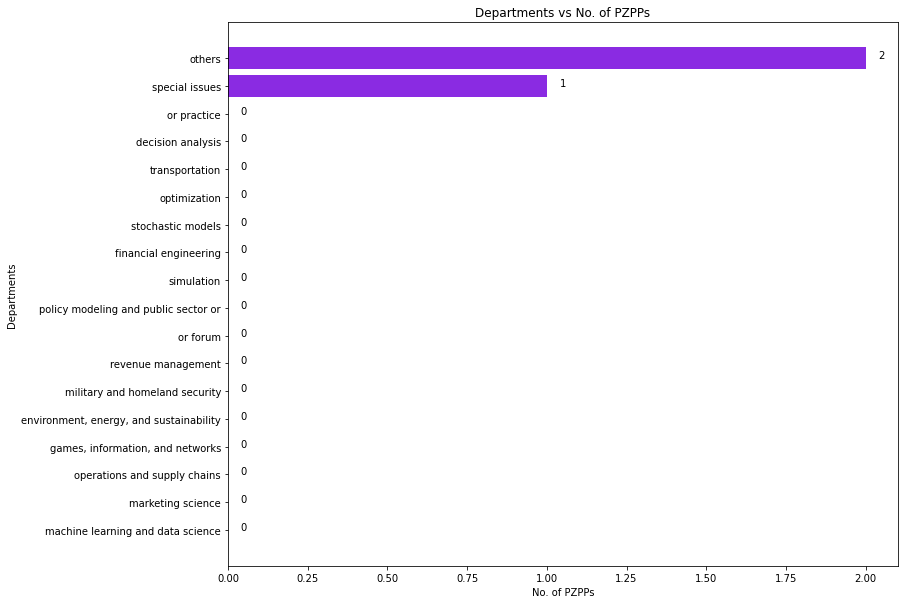

In [29]:
plt.figure(figsize = (12,10))
plt.barh(nms, d_npzpp,color = 'blueviolet')
plt.title('Departments vs No. of PZPPs')
plt.ylabel('Departments')
plt.xlabel('No. of PZPPs')
plt.gca().invert_yaxis()
addlabel(d_npzpp,1)

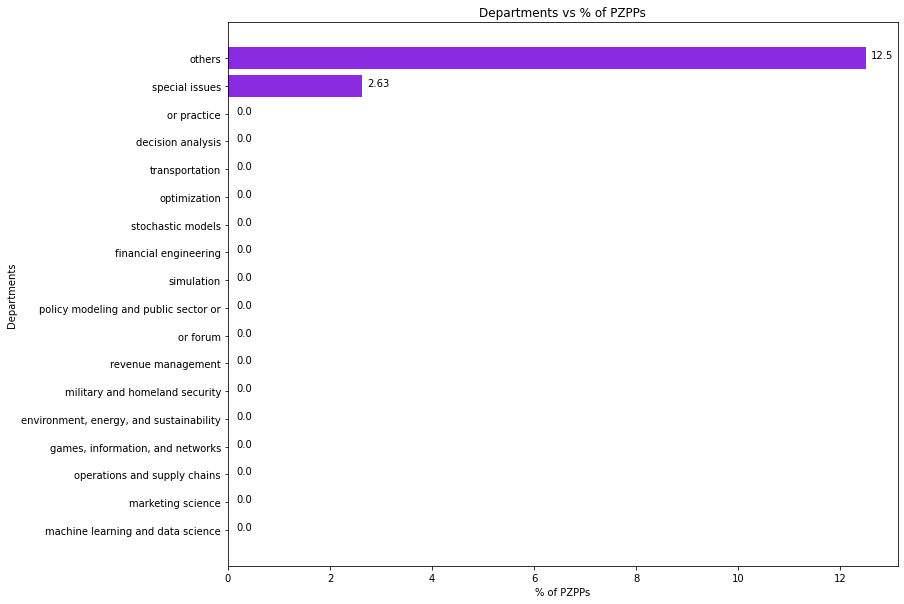

In [30]:
sorted_data = sorted(zip(nms, d_ppzpp), key=lambda x: x[1], reverse=True)
nms, d_ppzpp = zip(*sorted_data)

plt.figure(figsize = (12,10))
plt.barh(nms, d_ppzpp, color = 'blueviolet')
plt.title('Departments vs % of PZPPs')
plt.ylabel('Departments')
plt.xlabel('% of PZPPs')
plt.gca().invert_yaxis()
addlabel(d_ppzpp,1)

In [31]:
utilities.dept_merger(departments_time, 'optimization', ['optimiation','robust optimization','networks/graphs: theory','methods'])
utilities.dept_merger(departments_time, 'games, information, and networks', ['game, information, and networks','games, information, and networks.','games and networks','games, information, andnetworks'])
utilities.dept_merger(departments_time, 'operations and supply chains', ['manufacturing, service, and supply chain operations','operations and supply chain','operations management','manufacturing, service, and supply-chain operations'])
utilities.dept_merger(departments_time, 'military and homeland security', ['military'])
utilities.dept_merger(departments_time, 'stochastic models', ['stochastic model'])
utilities.dept_merger(departments_time, 'or practice', ['orpractice'])
utilities.dept_merger(departments_time, 'revenue management', ['revenue management and market analytics', 'marketing analytics and revenue management', 'revenue management andmarket analytics','budget management'])
utilities.dept_merger(departments_time, 'environment, energy, and sustainability', ['energy and sustainability',': environment, energy, and sustainability','environment, energy and sustainability','environment, energy, and natural resources'])
utilities.dept_merger(departments_time, 'policy modeling and public sector or', ['policy modeling and publicsector operations research'])
utilities.dept_merger(departments_time, 'financial engineering', ['finance'])
utilities.dept_merger(departments_time, 'special issues', ['special issue on or for the public interest - security and critical infrastructure', 'special issue: mathematical models of individual and group decision making in operations research', 'special issue on information and decisions in social and economic networks','special issue on operations research in health care'])
utilities.dept_merger(departments_time, 'others', ['nf', 'computing and decision technology', 'computing and information technologies', 'new/nontraditional areas', 'invited papers', 'telecommunications and networking', 'communications', 'computational economics'])
del departments_time['editor-in-chief']

In [32]:
davg_time = {}
for i in departments_time.keys():
    davg_time[i]=sum(list(departments_time[i]))//len(list(departments_time[i]))   
davg_time = {k:v for k,v in sorted(davg_time.items(), key = lambda x: x[1], reverse = True)}
department_names = list(davg_time.keys())
fr_avg_time = list(davg_time.values())

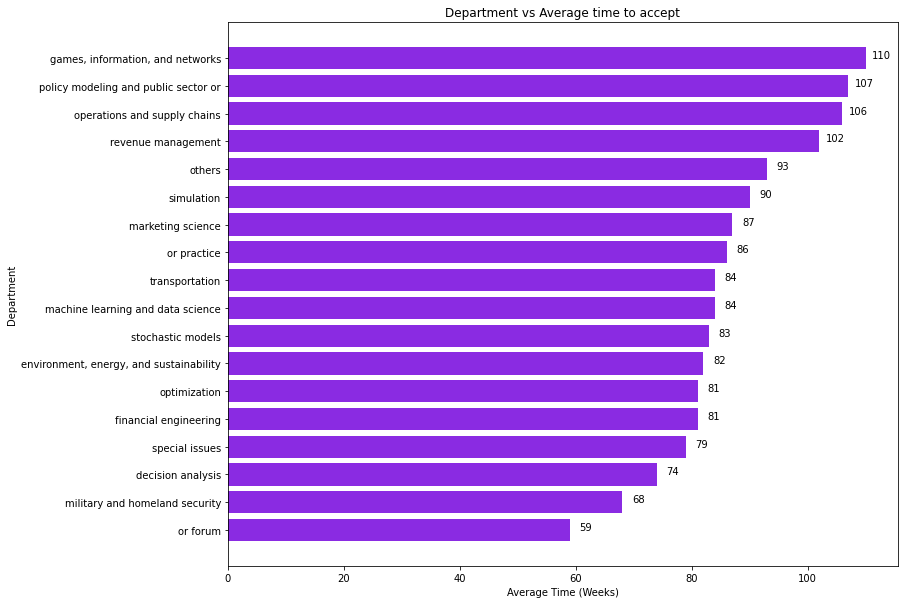

In [33]:
plt.figure(figsize = (12,10))
plt.barh(department_names, fr_avg_time,color = 'blueviolet')
plt.title('Department vs Average time to accept')
plt.ylabel('Department')
plt.xlabel('Average Time (Weeks)')
plt.gca().invert_yaxis()
addlabel(fr_avg_time,fr_avg_time)

In [34]:
dep_names1 = []
dep_freq1 = []
dep_time1 = []
for dep in departments_freq.keys():
    dep_names1.append(dep)
    dep_freq1.append(departments_freq[dep])
    dep_time1.append(davg_time[dep])

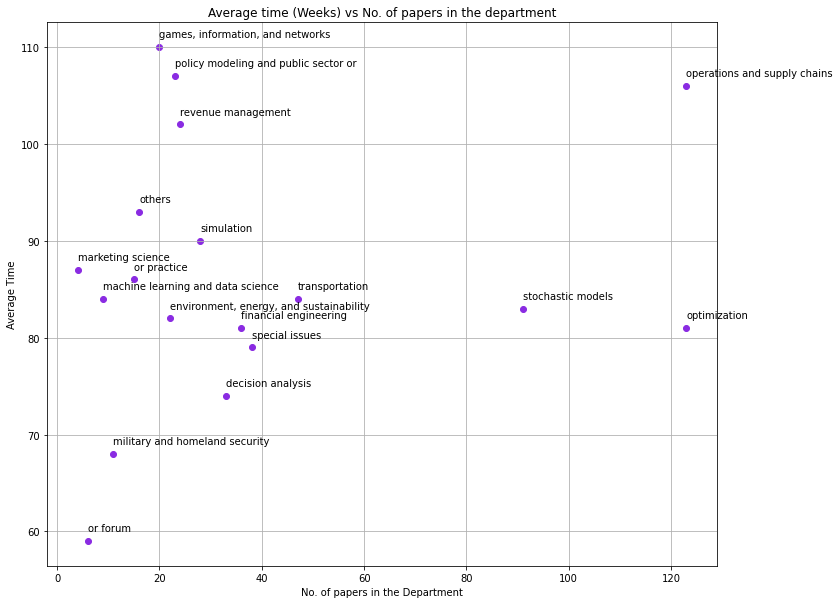

In [35]:
plt.figure(figsize = (12,10))
plt.scatter(dep_freq1, dep_time1,color = 'blueviolet')
for i, dep in enumerate(dep_names1):
    plt.annotate(dep, (dep_freq1[i], dep_time1[i]+1))
# plt.ylim(15,110)
plt.title('Average time (Weeks) vs No. of papers in the department')
plt.xlabel('No. of papers in the Department')
plt.ylabel('Average Time')
plt.grid()

In [36]:
utilities.country('OR',3,6)
global_ap, issue_ap, tot_aff = utilities.affiliation_pzpp('OR',3,6)
global_ap, tot_aff

({-1: 15, 0: 1, 1: 12}, {-1: 529, 0: 34, 1: 107})

In [38]:
departments_aff = utilities.affiliation_dept('OR',3,6)
len(departments_aff)

54

In [39]:
utilities.dept_merger(departments_aff, 'optimization', ['optimiation','robust optimization','networks/graphs: theory','methods'])
utilities.dept_merger(departments_aff, 'games, information, and networks', ['game, information, and networks','games, information, and networks.','games and networks','games, information, andnetworks'])
utilities.dept_merger(departments_aff, 'operations and supply chains', ['manufacturing, service, and supply chain operations','operations and supply chain','operations management','manufacturing, service, and supply-chain operations'])
utilities.dept_merger(departments_aff, 'military and homeland security', ['military'])
utilities.dept_merger(departments_aff, 'stochastic models', ['stochastic model'])
utilities.dept_merger(departments_aff, 'or practice', ['orpractice'])
utilities.dept_merger(departments_aff, 'revenue management', ['revenue management and market analytics', 'marketing analytics and revenue management', 'revenue management andmarket analytics','budget management'])
utilities.dept_merger(departments_aff, 'environment, energy, and sustainability', ['energy and sustainability',': environment, energy, and sustainability','environment, energy and sustainability','environment, energy, and natural resources'])
utilities.dept_merger(departments_aff, 'policy modeling and public sector or', ['policy modeling and publicsector operations research'])
utilities.dept_merger(departments_aff, 'financial engineering', ['finance'])
utilities.dept_merger(departments_aff, 'special issues', ['special issue on or for the public interest - security and critical infrastructure', 'special issue: mathematical models of individual and group decision making in operations research', 'special issue on information and decisions in social and economic networks','special issue on operations research in health care'])
utilities.dept_merger(departments_aff, 'others', ['nf', 'computing and decision technology', 'computing and information technologies', 'new/nontraditional areas', 'invited papers', 'telecommunications and networking', 'communications', 'computational economics'])
del departments_aff['editor-in-chief']

In [40]:
department_names = list(departments_aff.keys())
utilities.dept_wise_affiliation('OR',departments_aff)
utilities.year_wise_affiliation('OR',3,6)
utilities.issue_wise_affiliation('OR',3,6)

In [41]:
zero_country_address = utilities.zero_country('OR',3,6)

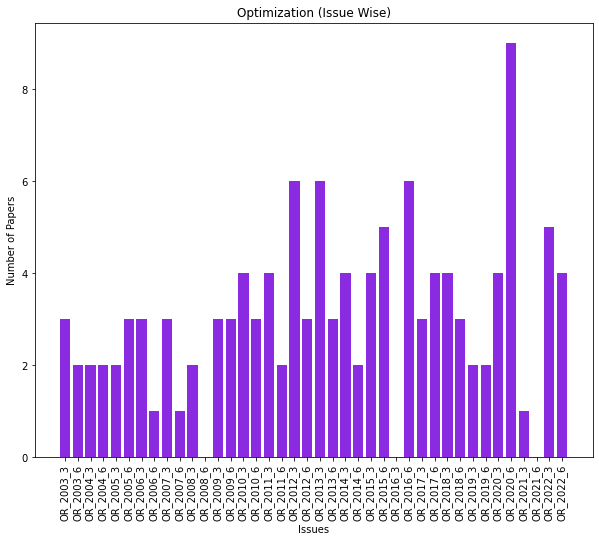

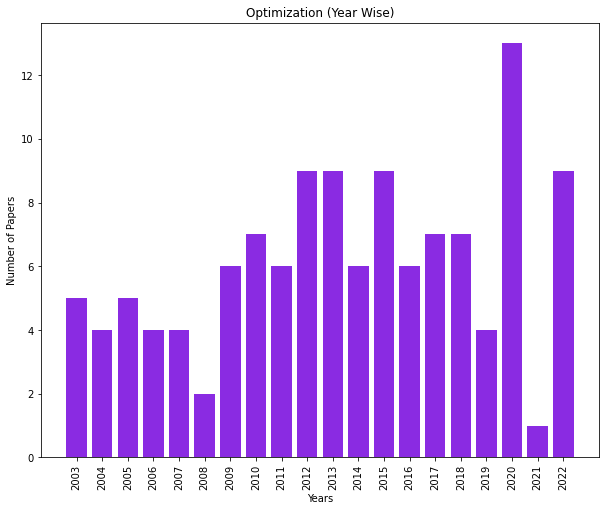

In [42]:
optimization_issue, optimization_year = utilities.department_total('Optimization', ('optimization','optimiation', 'robust optimization', 'networks/graphs: theory', 'methods'), address_list)

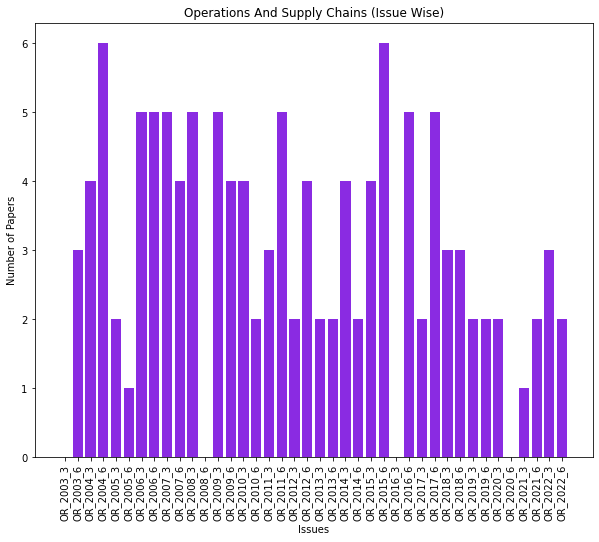

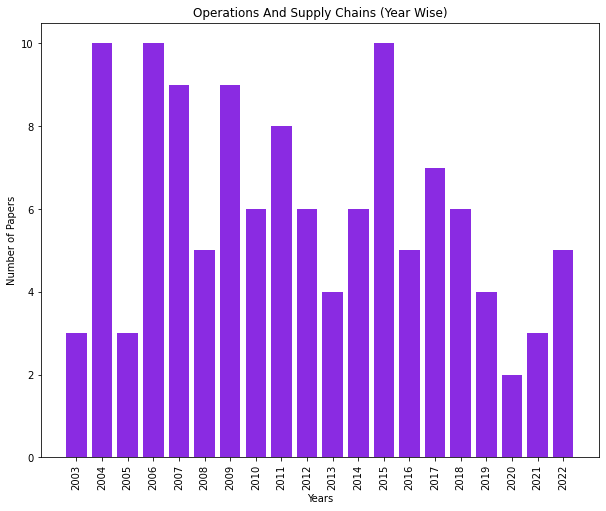

In [43]:
operations_and_supply_chains_issue, operations_and_supply_chains_year = utilities.department_total('Operations and Supply Chains', ['operations and supply chain','manufacturing, service, and supply chain operations' , 'operations and supply chains','operations management'], address_list)

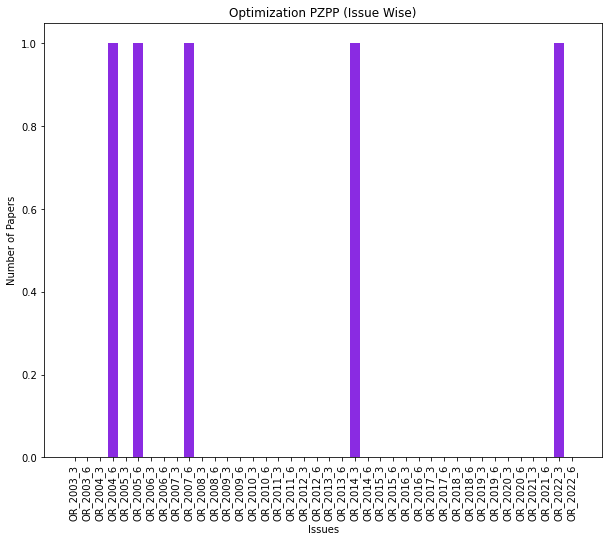

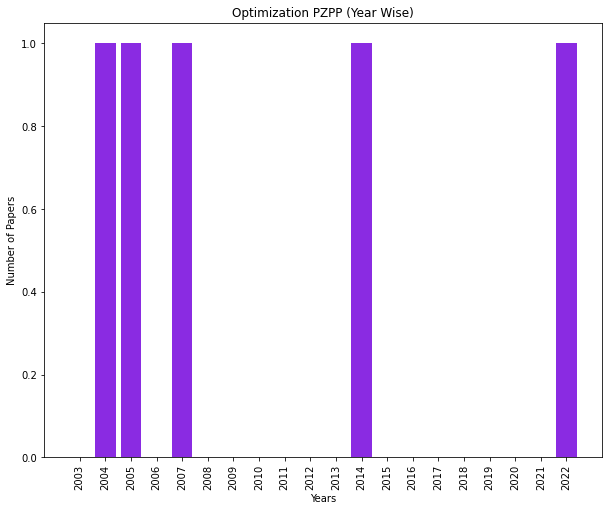

In [44]:
optimization_pzpp_issue, optimization_pzpp_year = utilities.department_pzpp('Optimization', ('optimization','optimiation', 'robust optimization', 'networks/graphs: theory', 'methods'), address_list)

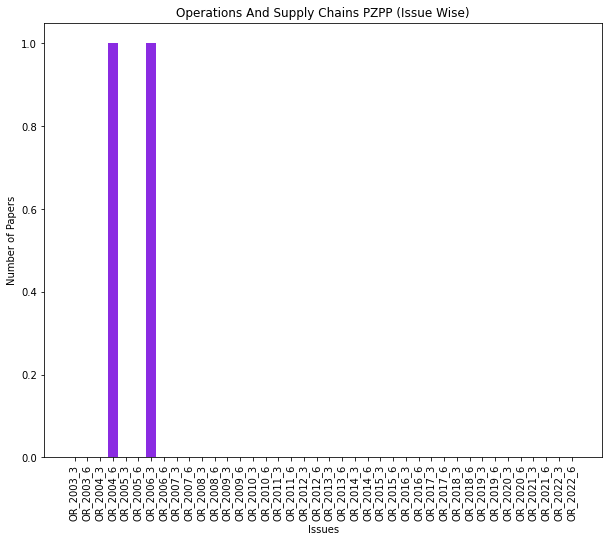

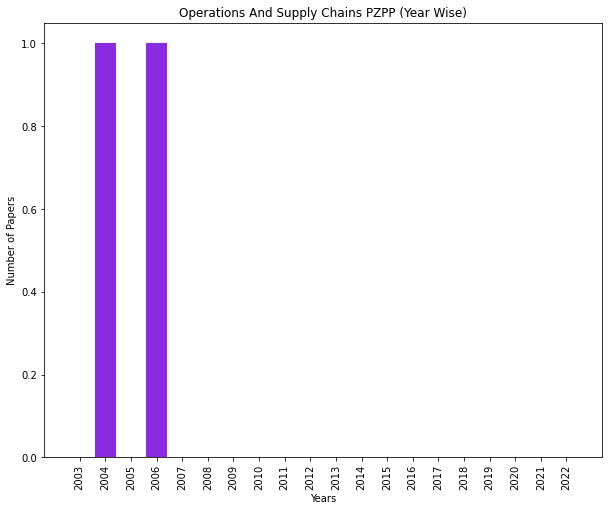

In [45]:
operations_and_supply_chains_pzpp_issue, operations_and_supply_chains_pzpp_year = utilities.department_pzpp('Operations and Supply Chains', ['operations and supply chain','manufacturing, service, and supply chain operations' , 'operations and supply chains','operations management'], address_list)